In [1]:
!pip install -q tensorflow==2.17.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 3.0 MB/s eta 0:00:00


In [2]:
#!pip install -q --upgrade tensorflow
import tensorflow as tf
print("Versão do TensorFlow:", tf.__version__)
print("Número de GPUs Disponíveis:", len(tf.config.list_physical_devices('GPU')))

Versão do TensorFlow: 2.17.0
Número de GPUs Disponíveis: 1


In [3]:
from tensorflow import keras
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np

import seaborn as sns

import pandas as pd

In [4]:
tf.__version__

'2.17.0'

In [5]:
%load_ext tensorboard

In [6]:
logdir='log'

In [7]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
            y=train_labels,
            epochs=5,
            validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.8973 - loss: 0.3307 - val_accuracy: 0.9834 - val_loss: 0.0532
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9852 - loss: 0.0473 - val_accuracy: 0.9870 - val_loss: 0.0378
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9895 - loss: 0.0324 - val_accuracy: 0.9890 - val_loss: 0.0356
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9935 - loss: 0.0218 - val_accuracy: 0.9879 - val_loss: 0.0433
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9936 - loss: 0.0197 - val_accuracy: 0.9904 - val_loss: 0.0339


In [11]:
y_true = test_labels
y_pred = np.argmax(model.predict(test_images), axis=-1)  # Usar np.argmax para obter as classes previstas

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [12]:
classes=[0,1,2,3,4,5,6,7,8,9]

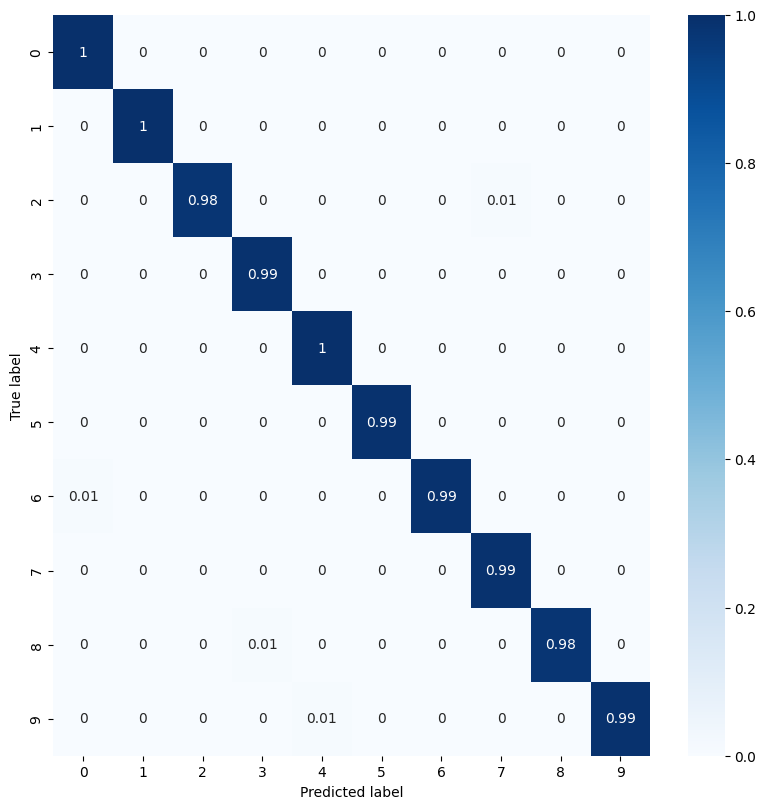

In [13]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [14]:
import numpy as np

# Sample Confusion Matrix (2x2 for binary classification)
#  [[TP, FP],
#   [FN, TN]]

confusion_matrix = np.array([[130, 20],
                             [10, 140]])

In [15]:
TP = confusion_matrix[0, 0]
FP = confusion_matrix[0, 1]
FN = confusion_matrix[1, 0]
TN = confusion_matrix[1, 1]

In [16]:
def accuracy(TP, TN, FP, FN):
  """Calculates accuracy."""
  return (TP + TN) / (TP + TN + FP + FN)

def sensitivity(TP, FN):
  """Calculates sensitivity (recall)."""
  return TP / (TP + FN)

def specificity(TN, FP):
  """Calculates specificity."""
  return TN / (TN + FP)

def precision(TP, FP):
  """Calculates precision."""
  return TP / (TP + FP)

def f1_score(precision, sensitivity):
  """Calculates F1-score."""
  return 2 * (precision * sensitivity) / (precision + sensitivity)

In [17]:
# Calculate metrics
acc = accuracy(TP, TN, FP, FN)
sens = sensitivity(TP, FN)
spec = specificity(TN, FP)
prec = precision(TP, FP)
f1 = f1_score(prec, sens)

# Print the results
print("Confusion Matrix:")
print(confusion_matrix)
print("\nMetrics:")
print(f"Accuracy: {acc:.4f}")
print(f"Sensitivity (Recall): {sens:.4f}")
print(f"Specificity: {spec:.4f}")
print(f"Precision: {prec:.4f}")
print(f"F1-score: {f1:.4f}")

Confusion Matrix:
[[130  20]
 [ 10 140]]

Metrics:
Accuracy: 0.9000
Sensitivity (Recall): 0.9286
Specificity: 0.8750
Precision: 0.8667
F1-score: 0.8966
